In [1]:
import os
import geopandas as gpd

data_path = "./"

In [2]:
boundaries_gdf = gpd.read_parquet(os.path.join(data_path, "boundaries.parquet"))
crs = boundaries_gdf.estimate_utm_crs()
boundaries_gdf = boundaries_gdf.to_crs(crs)

## Processing geometries

In [3]:
roads_gdf = gpd.read_parquet(os.path.join(data_path, "roads.parquet")).to_crs(crs)
# railways_gdf = gpd.read_parquet(os.path.join(data_path, "railways.parquet")).to_crs(crs)
water_gdf = gpd.read_parquet(os.path.join(data_path, "water.parquet")).to_crs(crs)

In [4]:
from blocksnet.blocks.cutting import preprocess_urban_objects

lines_gdf, polygons_gdf = preprocess_urban_objects(roads_gdf.to_crs(32636), None, water_gdf)

2025-09-15 01:43:01.174 | INFO     | blocksnet.blocks.cutting.preprocessing.core:preprocess_urban_objects:44 - Checking roads schema
2025-09-15 01:43:01.191 | INFO     | blocksnet.blocks.cutting.preprocessing.core:preprocess_urban_objects:51 - Checking railways schema
2025-09-15 01:43:01.192 | WARNING  | blocksnet.blocks.cutting.preprocessing.core:preprocess_urban_objects:53 - Creating empty railways
2025-09-15 01:43:01.195 | INFO     | blocksnet.blocks.cutting.preprocessing.core:preprocess_urban_objects:58 - Checking water schema


## Cut urban blocks

In [16]:
from blocksnet.blocks.cutting import cut_urban_blocks

blocks_gdf = cut_urban_blocks(boundaries_gdf, lines_gdf, polygons_gdf)

2025-09-15 01:49:48.898 | INFO     | blocksnet.blocks.cutting.processing.schemas:validate_and_preprocess_gdfs:45 - Checking boundaries schema
2025-09-15 01:49:48.909 | INFO     | blocksnet.blocks.cutting.processing.schemas:validate_and_preprocess_gdfs:49 - Checking line objects schema
2025-09-15 01:49:48.934 | INFO     | blocksnet.blocks.cutting.processing.schemas:validate_and_preprocess_gdfs:56 - Checking polygon objects schema
2025-09-15 01:49:48.948 | INFO     | blocksnet.blocks.cutting.processing.schemas:validate_and_preprocess_gdfs:63 - Checking buildings schema
2025-09-15 01:49:48.948 | WARNING  | blocksnet.blocks.cutting.processing.schemas:validate_and_preprocess_gdfs:65 - Creating empty buildings
2025-09-15 01:49:52.614 | SUCCESS  | blocksnet.blocks.cutting.processing.core:cut_urban_blocks:24 - 3420 blocks are successfully cut


<Axes: >

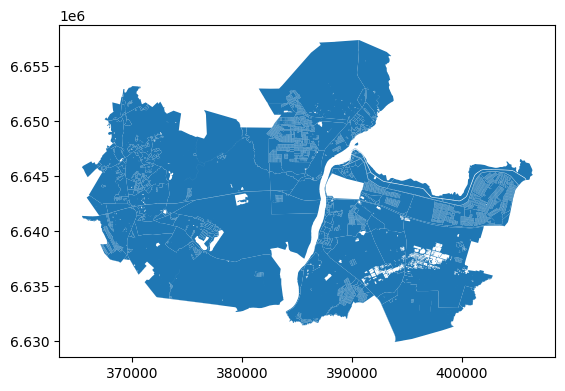

In [17]:
blocks_gdf.plot()

In [7]:
len(blocks_gdf)

3420

## Cut with splitting

In [8]:
from blocksnet.blocks.classification import BlocksClassifier

classifier = BlocksClassifier.default()
buildings_gdf = gpd.read_parquet('buildings.parquet').reset_index()

In [9]:
from blocksnet.blocks.cutting import cut_urban_blocks

blocks_gdf = cut_urban_blocks(boundaries_gdf, lines_gdf, polygons_gdf, buildings_gdf, classifier)

2025-09-15 01:43:05.724 | INFO     | blocksnet.blocks.cutting.processing.schemas:validate_and_preprocess_gdfs:45 - Checking boundaries schema
2025-09-15 01:43:05.732 | INFO     | blocksnet.blocks.cutting.processing.schemas:validate_and_preprocess_gdfs:49 - Checking line objects schema
2025-09-15 01:43:05.754 | INFO     | blocksnet.blocks.cutting.processing.schemas:validate_and_preprocess_gdfs:56 - Checking polygon objects schema
2025-09-15 01:43:05.769 | INFO     | blocksnet.blocks.cutting.processing.schemas:validate_and_preprocess_gdfs:63 - Checking buildings schema
2025-09-15 01:43:09.782 | SUCCESS  | blocksnet.blocks.cutting.processing.core:cut_urban_blocks:24 - 3420 blocks are successfully cut
2025-09-15 01:43:09.838 | INFO     | blocksnet.preprocessing.feature_engineering.core:_calculate_usual_features:35 - Calculating usual features
2025-09-15 01:43:09.861 | INFO     | blocksnet.preprocessing.feature_engineering.core:_calculate_radiuses:46 - Calculating radiuses
100%|██████████| 

<Axes: >

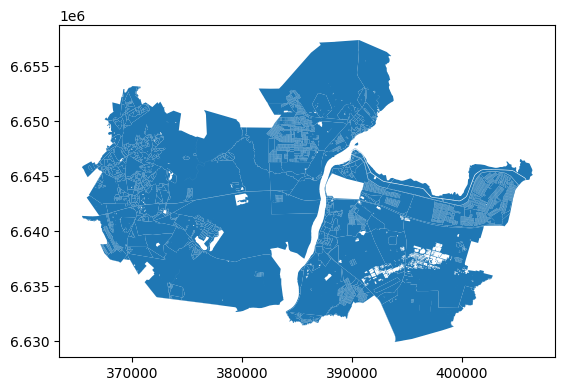

In [12]:
blocks_gdf.plot()

In [13]:
len(blocks_gdf)

3699